In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = {'x':[5.9,4.6,6.2,4.7,5.5,5.0,4.9,5.1,6.0], 'y':[3.2,2.9,2.8,3.2,4.2,3.0,3.1,3.8,3.0]}

In [23]:
data = pd.DataFrame(data, index=['P1','P2','P3','P4','P5','P6','P7','P8','P9'])
data['Cluster'] = 0
data[['Cluster']]


,Cluster
P1,0
P2,0
P3,0
P4,0
P5,0
P6,0
P7,0
P8,0
P9,0


Creating mean data frame

In [24]:
mean_data = {'x':[6.2,6.6,6.5],'y':[3.2,3.7,3.0]}
mean_data = pd.DataFrame(mean_data, index=['mean 1','mean 2','mean 3'])
mean_data

,x,y
mean 1,6.2,3.2
mean 2,6.6,3.7
mean 3,6.5,3.0


## Ploting the data ##

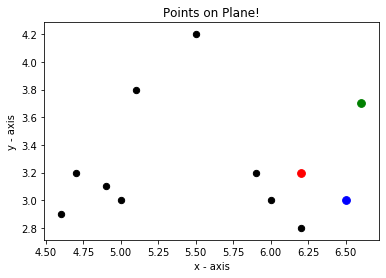

In [25]:
plt.scatter(data['x'], data['y'], color= "black", s=40) 

plt.scatter(mean_data.loc['mean 1','x'], mean_data.loc['mean 1','y'], c='red',s=60)
plt.scatter(mean_data.loc['mean 2', 'x'], mean_data.loc['mean 2', 'y'], c='green',s=60)
plt.scatter(mean_data.loc['mean 3','x'], mean_data.loc['mean 3', 'y'], c='blue',s=60)
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
 
plt.title('Points on Plane!') 
  
# function to show the plot 
plt.show()

## Learning Algorithm and Printing final mean and iterations. ##

In [26]:
Y = data[['Cluster']]
i = 0
while(True):
    data['dis_from_m1'] =  np.sqrt((data.loc[:,'x']-mean_data.loc['mean 1','x'])**2 + (data.loc[:,'y']-mean_data.loc['mean 1','y'])**2) 
    
    data['dis_from_m2'] =  np.sqrt((data.loc[:,'x']-mean_data.loc['mean 2','x'])**2 + (data.loc[:,'y']-mean_data.loc['mean 2','y'])**2) 
    
    data['dis_from_m3'] =  np.sqrt((data.loc[:,'x']-mean_data.loc['mean 3', 'x'])**2 + (data.loc[:,'y']-mean_data.loc['mean 3','y'])**2) 
    
    data['min_dis'] = np.amin(data.loc[:,['dis_from_m1','dis_from_m2','dis_from_m3']], axis=1) 
    
    label1_after = data['min_dis'] == data['dis_from_m1']
    
    label2_after = data['min_dis'] == data['dis_from_m2']
    
    label3_after = data['min_dis'] == data['dis_from_m3']
    
    data.at[label2_after,'Cluster'] = 2
    
    data.at[label3_after,'Cluster'] = 3
    
    data.at[label1_after,'Cluster'] = 1
        
    mean_data.loc['mean 1'] = np.mean(data.loc[data['Cluster']==1,['x','y']],axis=0)
    #print(mean_data.loc['mean 1'])
    
    mean_data.loc['mean 2'] = np.mean(data.loc[data['Cluster']==2,['x','y']],axis=0)
    #print(mean_data.loc['mean 2'])
    
    mean_data.loc['mean 3'] = np.mean(data.loc[data['Cluster']==3,['x','y']],axis=0)
    #print(mean_data.loc['mean 2'])
    
    if(i==0):
        print("Result After First Iteration")
        print(mean_data)
    if(i==1):
        print("Result After second Iteration")
        print(mean_data)
    
    #l = str(list(data['Cluster']))
    
    if data[['Cluster']].equals(Y):
        break
        
    Y = data[['Cluster']]
    
    i = i+1
print("Result After Convergence")
print(mean_data)
print("Number of iteration before convergence")
print(i)

Result After First Iteration
               x         y
mean 1  5.171429  3.171429
mean 2  5.500000  4.200000
mean 3  6.200000  2.800000
Result After second Iteration
               x     y
mean 1  4.800000  3.05
mean 2  5.300000  4.00
mean 3  6.033333  3.00
Result After Convergence
               x     y
mean 1  4.800000  3.05
mean 2  5.300000  4.00
mean 3  6.033333  3.00
Number of iteration before convergence
2
      x    y  Cluster  dis_from_m1  dis_from_m2  dis_from_m3   min_dis
P1  5.9  3.2        3     1.110180     1.000000     0.240370  0.240370
P2  4.6  2.9        1     0.250000     1.303840     1.436817  0.250000
P3  6.2  2.8        3     1.422146     1.500000     0.260342  0.260342
P4  4.7  3.2        1     0.180278     1.000000     1.348250  0.180278
P5  5.5  4.2        2     1.346291     0.282843     1.313181  0.282843
P6  5.0  3.0        1     0.206155     1.044031     1.033333  0.206155
P7  4.9  3.1        1     0.111803     0.984886     1.137737  0.111803
P8  5.1  3.8   

## Final Plot ##

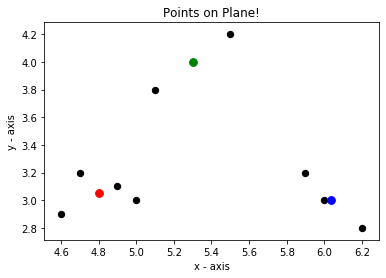

In [27]:
#Plotting the data
plt.scatter(data['x'], data['y'], color= "black", s=40) 

plt.scatter(mean_data.loc['mean 1','x'], mean_data.loc['mean 1','y'], c='red',s=60)
plt.scatter(mean_data.loc['mean 2', 'x'], mean_data.loc['mean 2', 'y'], c='green',s=60)
plt.scatter(mean_data.loc['mean 3','x'], mean_data.loc['mean 3', 'y'], c='blue',s=60)
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
 
plt.title('Points on Plane!') 
  
# function to show the plot 
plt.show()